In [51]:
#importing the nessessory library,function and models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [52]:
# Load the dataset
data = pd.read_csv('diabetes_binary_classification_data44.csv')
# Display the first few rows and summary of the dataset
print(data.head())
print(data.info())


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [53]:
# Define features and target variable(all features other than Diabetes_binary are catagorized under X)
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Split the data into training and test sets(80% for training and 20% for testing the model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# some features may have larger ranges so lets use data on a similar scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Initialize and train the Logistic Regression model(lg)
lg = LogisticRegression(max_iter=1000) #Increasing max_iter to ensures the algorithm has enough time to converge.
lg.fit(X_train, y_train)

# Make predictions
y_pred_lg = lg.predict(X_test)
y_pred_proba_lg = lg.predict_proba(X_test)[:, 1]# predicted probabilities for class 1 and are useful ROC-AUC
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lg)#ratio of correctly predicted observations (both positive and negative) to the total observations:
confusion_matrix_lg=confusion_matrix(y_test, y_pred_lg)#calculating the True Positives (TP),True Positives (TP),False Positives (FP) and False Negatives (FN)
ROC_AUC=roc_auc_score(y_test, y_pred_proba_lg)# (Receiver Operating Characteristic - Area Under the Curve)
# Evaluate the Random Forest model
print(f"Logistic Regression Accuracy--{accuracy:.4f},    ROC_AUC--{ROC_AUC:.4f} ")
print("Confusion Matrix:")
print(confusion_matrix_lg)


Logistic Regression Accuracy--0.8659,    ROC_AUC--0.8264 
Confusion Matrix:
[[42773   966]
 [ 5839  1158]]


In [55]:
# Initialize and train the Random Forest Classifier model(rf)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf =rf.predict_proba(X_test)[:, 1]
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
confusion_matrix_rf=confusion_matrix(y_test, y_pred_rf)
ROC_AUC=roc_auc_score(y_test, y_pred_proba_rf)#ROC_AUC
# Evaluate the Random Forest model
print(f"Logistic Regression Accuracy--{accuracy:.4f},    ROC_AUC--{ROC_AUC:.4f} ")
print("Confusion Matrix:")
print(confusion_matrix_rf)


Logistic Regression Accuracy--0.8598,    ROC_AUC--0.8015 
Confusion Matrix:
[[42402  1337]
 [ 5778  1219]]


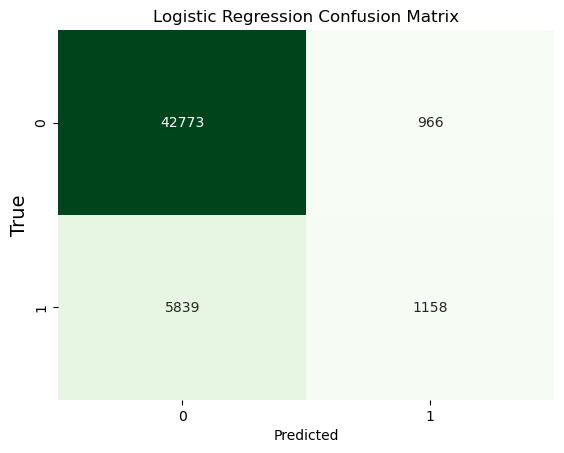

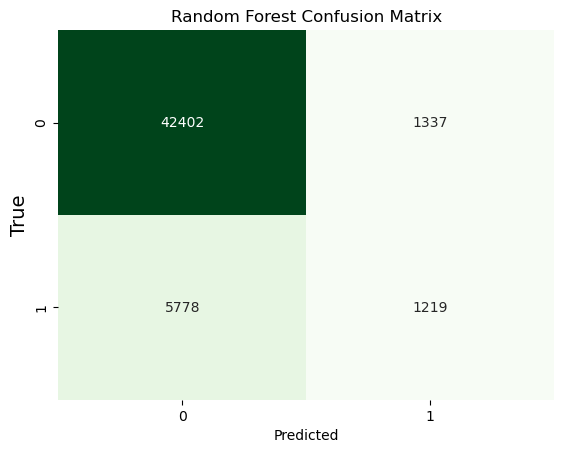

In [56]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix '):
    sns.heatmap(cm, annot=True, fmt='d',cbar=False,cmap='Greens')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True', fontsize=14)
    plt.show()

# Plot confusion matrix for Logistic Regression
cm_lg = confusion_matrix(y_test, y_pred_lg)
plot_confusion_matrix(cm_lg, title='Logistic Regression Confusion Matrix')

# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, title='Random Forest Confusion Matrix')


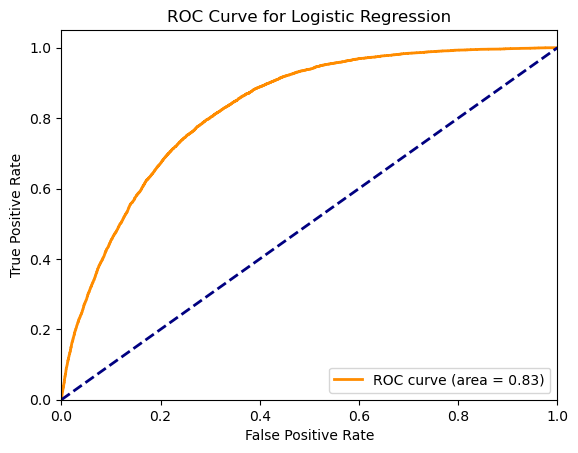

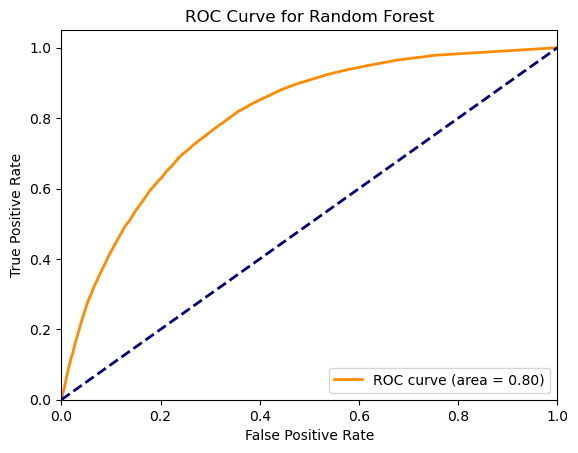

In [57]:
# Function to plot ROC curve
from sklearn.metrics import auc
def plot_roc_curve(y_test, y_pred_proba, model_name='Model'):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
# Plot ROC curve for Logistic Regression
plot_roc_curve(y_test, y_pred_proba_lg, model_name='Logistic Regression')
# Plot ROC curve for Random Forest
plot_roc_curve(y_test, y_pred_proba_rf, model_name='Random Forest') 

In [59]:
# using the model which was fitted befor and finding importances feature importances  from  Random Forest model
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization the importante factores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Display feature importances
print(feature_importance_df)


                 Feature  Importance
3                    BMI    0.184635
18                   Age    0.122643
20                Income    0.098785
15              PhysHlth    0.084182
13               GenHlth    0.070068
19             Education    0.069318
14              MentHlth    0.063536
0                 HighBP    0.042603
4                 Smoker    0.033403
8                 Fruits    0.033298
17                   Sex    0.028051
1               HighChol    0.026777
9                Veggies    0.026230
7           PhysActivity    0.025966
16              DiffWalk    0.024442
6   HeartDiseaseorAttack    0.018274
12           NoDocbcCost    0.015135
5                 Stroke    0.012478
11         AnyHealthcare    0.008726
10     HvyAlcoholConsump    0.007765
2              CholCheck    0.003684


In [60]:
# Select the top N important features (e.g., top 10)
top_n = 10
top_features = feature_importance_df.head(top_n)['Feature'].tolist()

# Display the selected top features
print("Selected top features based on importance:", top_features)


Selected top features based on importance: ['BMI', 'Age', 'Income', 'PhysHlth', 'GenHlth', 'Education', 'MentHlth', 'HighBP', 'Smoker', 'Fruits']


In [61]:
# Subset the features from the original dataset
X_imp = data[top_features]
y_imp = data['Diabetes_binary']

# Split into training and testing sets on the important factors(imp)
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=0.2, random_state=42)

# Optionally scale the features
X_train_imp = scaler.fit_transform(X_train_imp)
X_test_imp = scaler.transform(X_test_imp)


In [65]:
#trianing the data set on important facors for 
lg.fit(X_train_imp, y_train_imp)#logistic Regression 
rf.fit(X_train_imp, y_train_imp)#Random Forest

RandomForestClassifier(random_state=42)

In [68]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Logistic Regression having 3 flod
cv_scores_lg = cross_val_score(lg, X_train_imp, y_train_imp, cv=4, scoring='accuracy')#providing cross valadition of 4 fold
for i, score in enumerate(cv_scores_lg, start=1):
    print(f"Cross-Validation_lg {i}: {score:.4f}")  #printing all cv accuracy for logistic regression

# Perform cross-validation for Random Forest having 3 flod
cv_scores_rf = cross_val_score(rf, X_train_imp, y_train_imp, cv=4, scoring='accuracy')
for i, score in enumerate(cv_scores_rf, start=1):
    print(f"Cross-Validation_rf {i}: {score:.4f}") #printing all cv accuracy for random forset

Cross-Validation_lg 1: 0.8615
Cross-Validation_lg 2: 0.8619
Cross-Validation_lg 3: 0.8613
Cross-Validation_lg 4: 0.8601
Cross-Validation_rf 1: 0.8481
Cross-Validation_rf 2: 0.8493
Cross-Validation_rf 3: 0.8468
Cross-Validation_rf 4: 0.8467


In [74]:
#from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

# Train Logistic Regression with the important facotrs
y_pred_lg_imp = lg.predict(X_test_imp)
y_pred_proba_lg_imp =lg.predict_proba(X_test_imp)[:, 1]#calculates the predicted probabilities for the positive class (diabetes)

# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test_imp, y_pred_lg_imp)
confusion_matrix_lg=confusion_matrix(y_test_imp, y_pred_lg_imp)
ROC_AUC=roc_auc_score(y_test_imp, y_pred_lg_imp) # Calculate ROC AUC score for Logistic Regression

# Evaluate the Random Forest model
print(f"Logistic Regression Accuracy--{accuracy:.4f},    ROC_AUC--{ROC_AUC:.4f} ")
print("Confusion Matrix:")
print(confusion_matrix_lg)

# Train Random Forest Classifier with the important facotrs
y_pred_rf_imp = rf.predict(X_test_imp)
y_pred_proba_rf_imp = rf.predict_proba(X_test_imp)[:, 1]
accuracy = accuracy_score(y_test_imp, y_pred_rf_imp)
confusion_matrix_rf=confusion_matrix(y_test_imp, y_pred_rf_imp)
ROC_AUC=roc_auc_score(y_test_imp, y_pred_proba_rf_imp)

# Evaluate the Random Forest model
print(f"Random Forest accuracy--{accuracy:.4f},    ROC_AUC--{ROC_AUC:.4f} ")
print("Confusion Matrix:")
print(confusion_matrix_rf)

Logistic Regression Accuracy--0.8636,    ROC_AUC--0.5531 
Confusion Matrix:
[[42943   796]
 [ 6126   871]]
Random Forest accuracy--0.8479,    ROC_AUC--0.7689 
Confusion Matrix:
[[41696  2043]
 [ 5676  1321]]


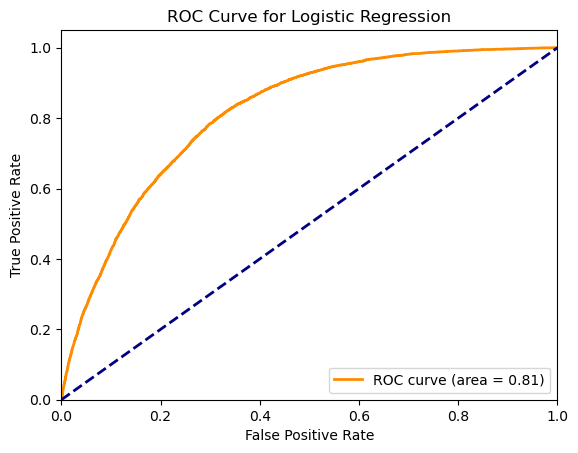

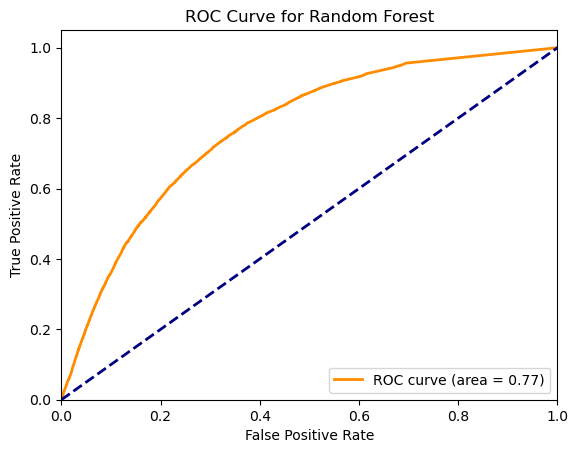

In [75]:
# Function to plot ROC curve
from sklearn.metrics import auc
def plot_roc_curve(y_test_imp, y_pred_proba_imp, model_name='Model'):
    fpr, tpr, thresholds = roc_curve(y_test_imp, y_pred_proba_imp)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
# Plot ROC curve for Logistic Regression
plot_roc_curve(y_test_imp, y_pred_proba_lg_imp, model_name='Logistic Regression')
# Plot ROC curve for Random Forest
plot_roc_curve(y_test_imp, y_pred_proba_rf_imp, model_name='Random Forest') 